In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants, optimize
from pyproj import Geod
import pickle
import pandas as pd
from scipy.optimize import LinearConstraint
from scipy.optimize import minimize
import os
import glob
# Load the node config dictionary this contains information about the nodes
# (receivers) position and name
node_config = np.load("node_config_fixed.npy", allow_pickle=True).item()

# Now load in waveforms
waveforms = np.load("exported_waveforms.npy", allow_pickle=True)

node_code = {}
for key in node_config.keys():
    node_code[node_config[key]['Site']] = key


for i in range(0,7):
    waveforms[i]['lat'] = node_config[node_code[waveforms[i]['site_name']]]['Position']['lat']
    waveforms[i]['lon'] = node_config[node_code[waveforms[i]['site_name']]]['Position']['lon']

# File path to data files /Volumes/WD_ITP/Bath_VLF_2023_decoded

folder_path = '/Volumes/WD_ITP/Bath_VLF_2023_decoded'
file_list = glob.glob(os.path.join(folder_path, '*.npy'))
data_list = {}
for file_path in file_list:
    filename = os.path.basename(file_path)
    key = os.path.splitext(filename)[0]
    data_list[key] = np.load(file_path, allow_pickle=True)

In [2]:
keys_list = list(data_list.keys())

In [75]:
dt = np.timedelta64(int(data_list[keys_list[0]][w_number]["smplint"] * 1e9), "ns")

In [113]:
keys_list

['Akrotiri_569218Q0B0024002A.202301310001',
 'Akrotiri_569218Q0B0024002A.202301310002',
 'Cabauw_569218Q0B003D003E.202301310001',
 'Cabauw_569218Q0B003D003E.202301310002',
 'Camborne_569218Q0B0025002A.202301310001',
 'Camborne_569218Q0B0025002A.202301310002',
 'Dunkeswell_569218Q0B001E002A.202301310001',
 'Dunkeswell_569218Q0B001E002A.202301310002',
 'Herstmonceux_569218Q0B003D002A.202301310001',
 'Herstmonceux_569218Q0B003D002A.202301310002',
 'Keflavik_569218Q0B0027003E.202301310001',
 'Lerwick_569218Q0B0037003F.202301310001',
 'Lerwick_569218Q0B0037003F.202301310002',
 'Payerne_569218Q0B00170029.202301310001',
 'Payerne_569218Q0B00170029.202301310002',
 'Tartu_569218Q0B0036003F.202301310001',
 'Tartu_569218Q0B0036003F.202301310002',
 'Watnall_569218Q0B001D0029.202301310001',
 'Watnall_569218Q0B001D0029.202301310002']

In [94]:
keys_list[1]

'Akrotiri_569218Q0B0024002A.202301310002'

In [101]:
def arrange_waveform(data_list, keys_list):
    waveform_list = [data_list[keys_list][0]["wvfmdata"]]
    
    for i in range(1, len(data_list[keys_list])):
        waveform_list.append(data_list[keys_list][i]["wvfmdata"])

    waveform = np.concatenate(waveform_list)
    return waveform

In [102]:
def arrange_t(data_list, keys_list, dt):
    t=[]
    for i in range(0,len(data_list[keys_list])):
        for j in range(0,1024):
            t.append(data_list[keys_list][i]["starttime"] + dt * j)
    return t

In [110]:
def pair_graph(data_list, keys_list, i, j, dt):
    waveform1 = arrange_waveform(data_list, keys_list[i])
    t1 = arrange_t(data_list, keys_list[i], dt)

    waveform2 = arrange_waveform(data_list, keys_list[j])
    t2 = arrange_t(data_list, keys_list[j], dt)

    waveform = np.concatenate((waveform1, waveform2))
    t = np.concatenate((t1, t2))
    return waveform, t

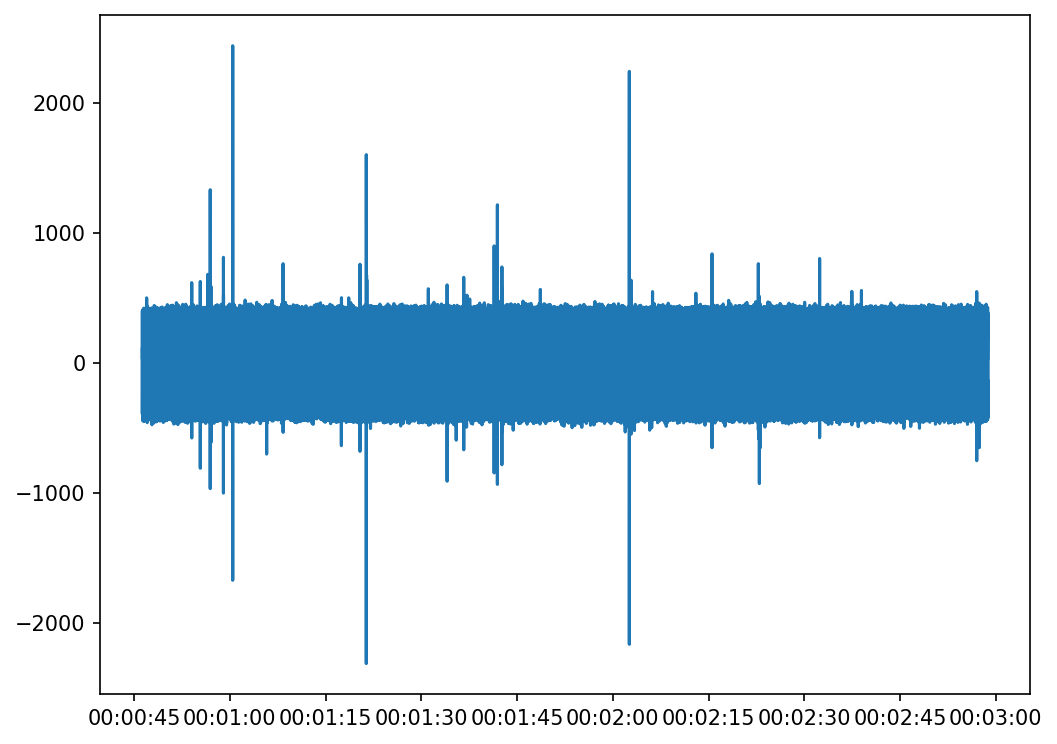

In [112]:
wvfm_cab, t_cab = pair_graph(data_list, keys_list, 2, 3, dt)

plt.figure(figsize=(8, 6), dpi=150)
plt.plot(t_cab, wvfm_cab)

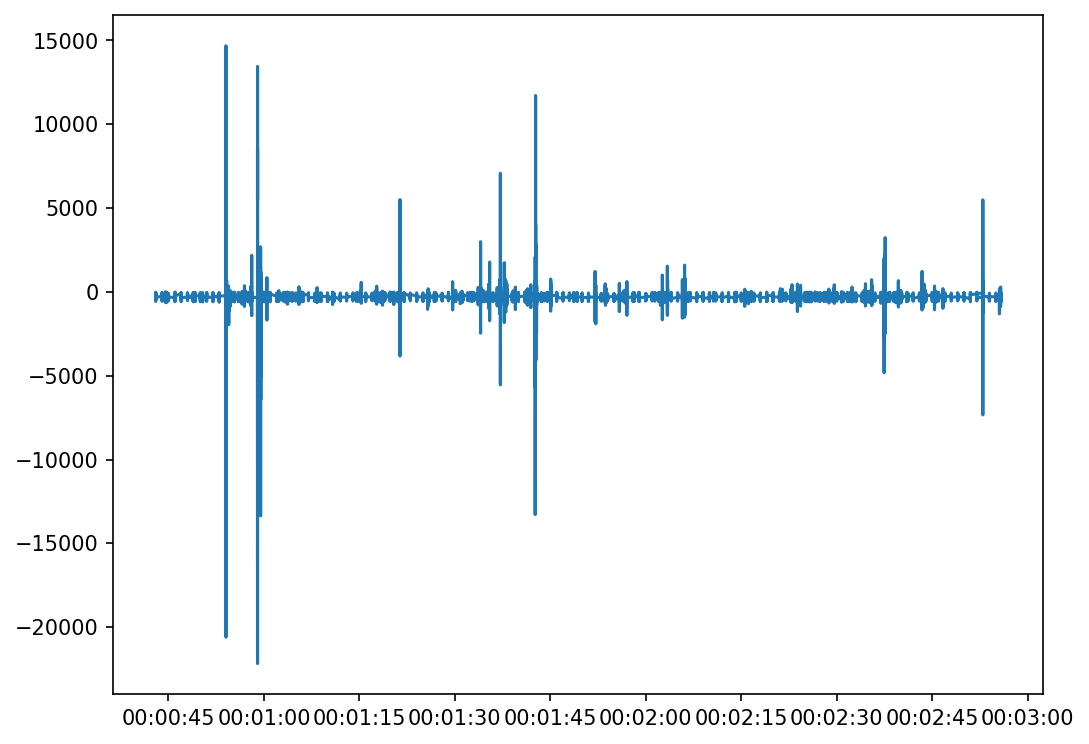

In [109]:
waveformakro1 = arrange_waveform(data_list, keys_list[0])
takro1 = arrange_t(data_list, keys_list[0], dt)

waveformakro2 = arrange_waveform(data_list, keys_list[1])
takro2 = arrange_t(data_list, keys_list[1], dt)

waveformakro = np.concatenate((waveformakro1, waveformakro2))
takro = np.concatenate((takro1, takro2))

plt.figure(figsize=(8, 6), dpi=150)
plt.plot(takro, waveformakro)

In [106]:
print(keys_list[0][:3])

Akr


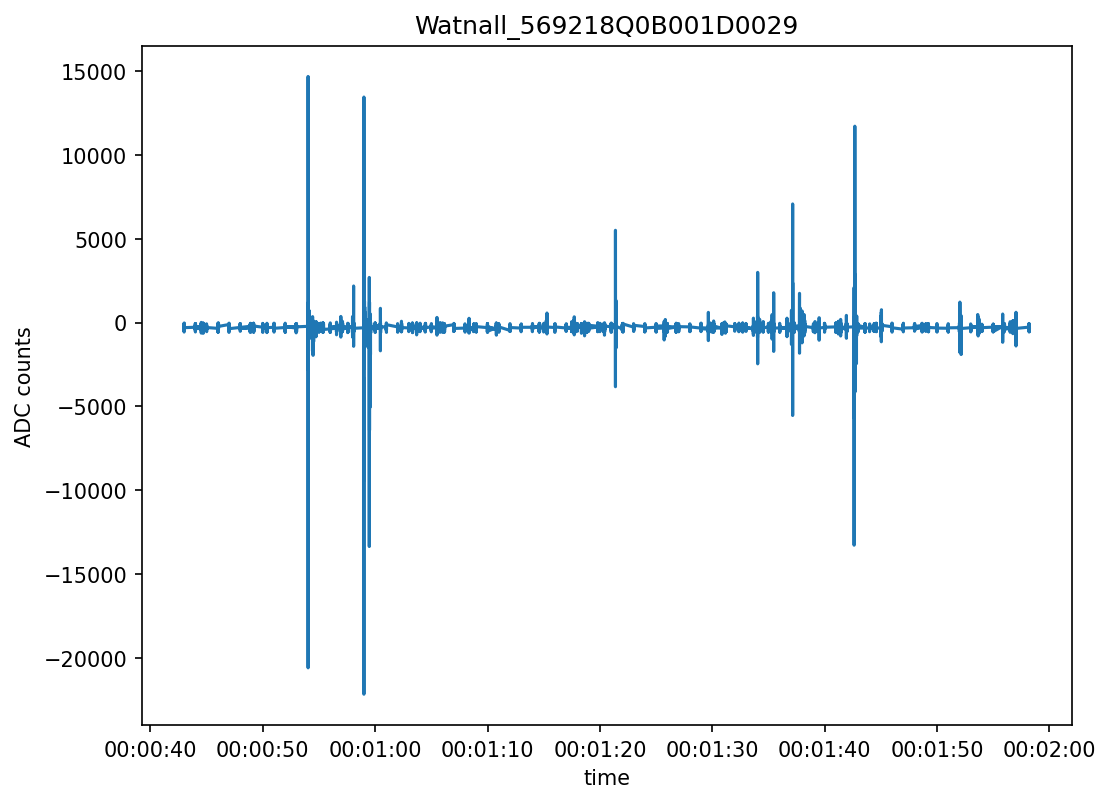

In [73]:
#w_number = 0
#t_start = data_list[keys_list[0]][0]["starttime"]
#t_end = data_list[keys_list[0]][796]["endtime"]
dt = np.timedelta64(int(data_list[keys_list[0]][w_number]["smplint"] * 1e9), "ns")

t=[]
for i in range(0,797):
    for j in range(0,1024):
        t.append(data_list[keys_list[0]][i]["starttime"] + dt * j)

plt.figure(figsize=(8, 6), dpi=150)
plt.plot(t, waveform)
plt.xlabel("time")
plt.ylabel("ADC counts")
plt.title(filename[:-17])
plt.savefig(filename[:-17] + "_" + str(w_number) + ".png")
plt.show()